# Data Understanding

In [1]:
import imblearn
from imblearn.over_sampling import SMOTENC
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True, grid=False)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import lifelines

pd.set_option("display.max_columns", None)

In [2]:
hr_df = pd.read_csv(os.path.join('Human_resources.csv'))
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
hr_df = hr_df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'])
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

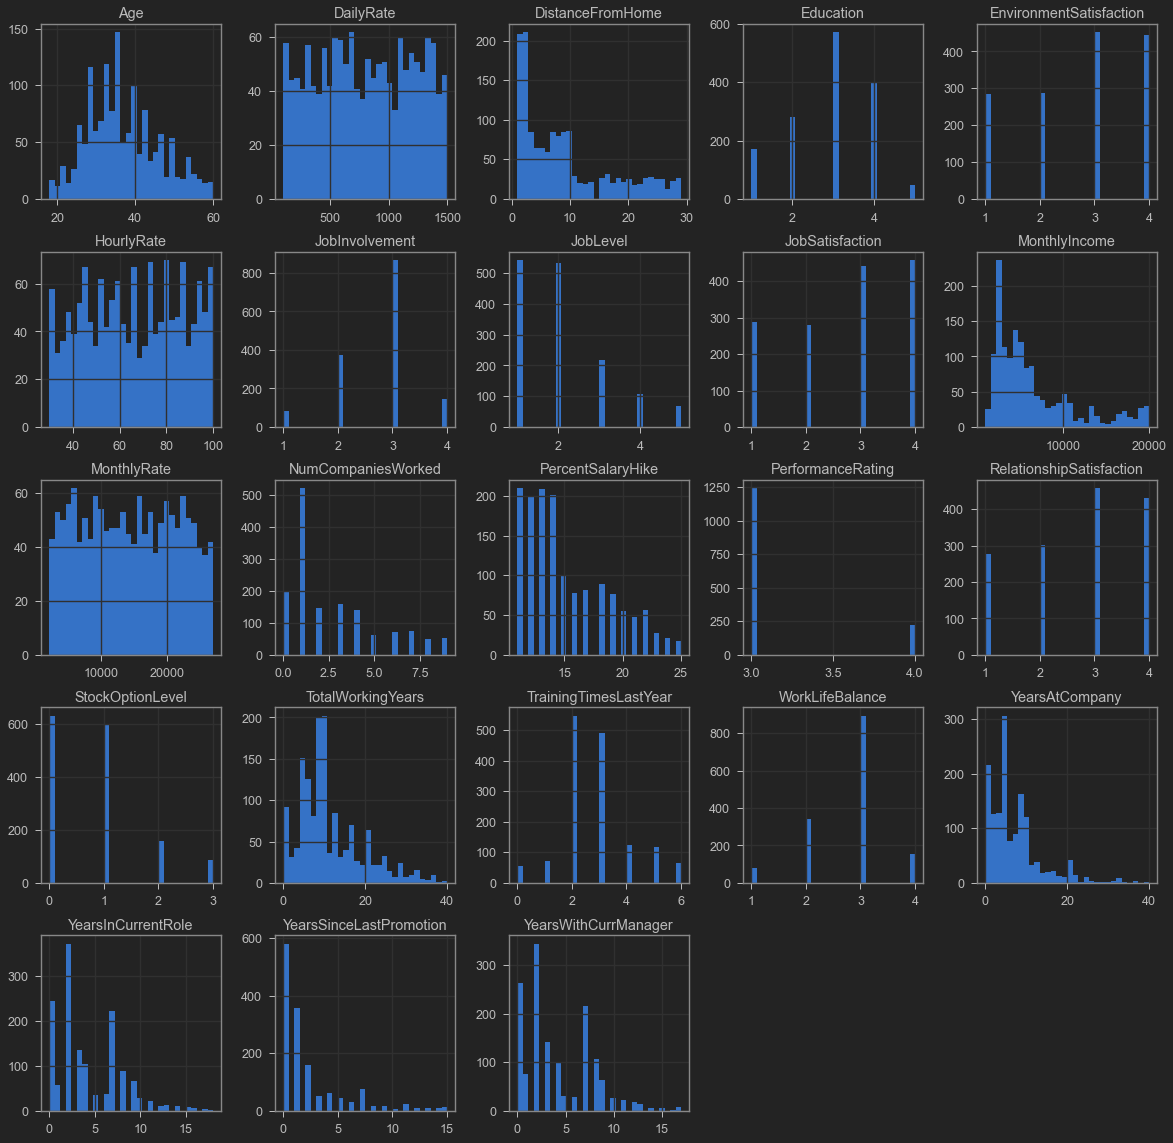

In [5]:
hr_df.hist(bins=30, figsize=(20,20), color='b')

# Data Preparation

<AxesSubplot:>

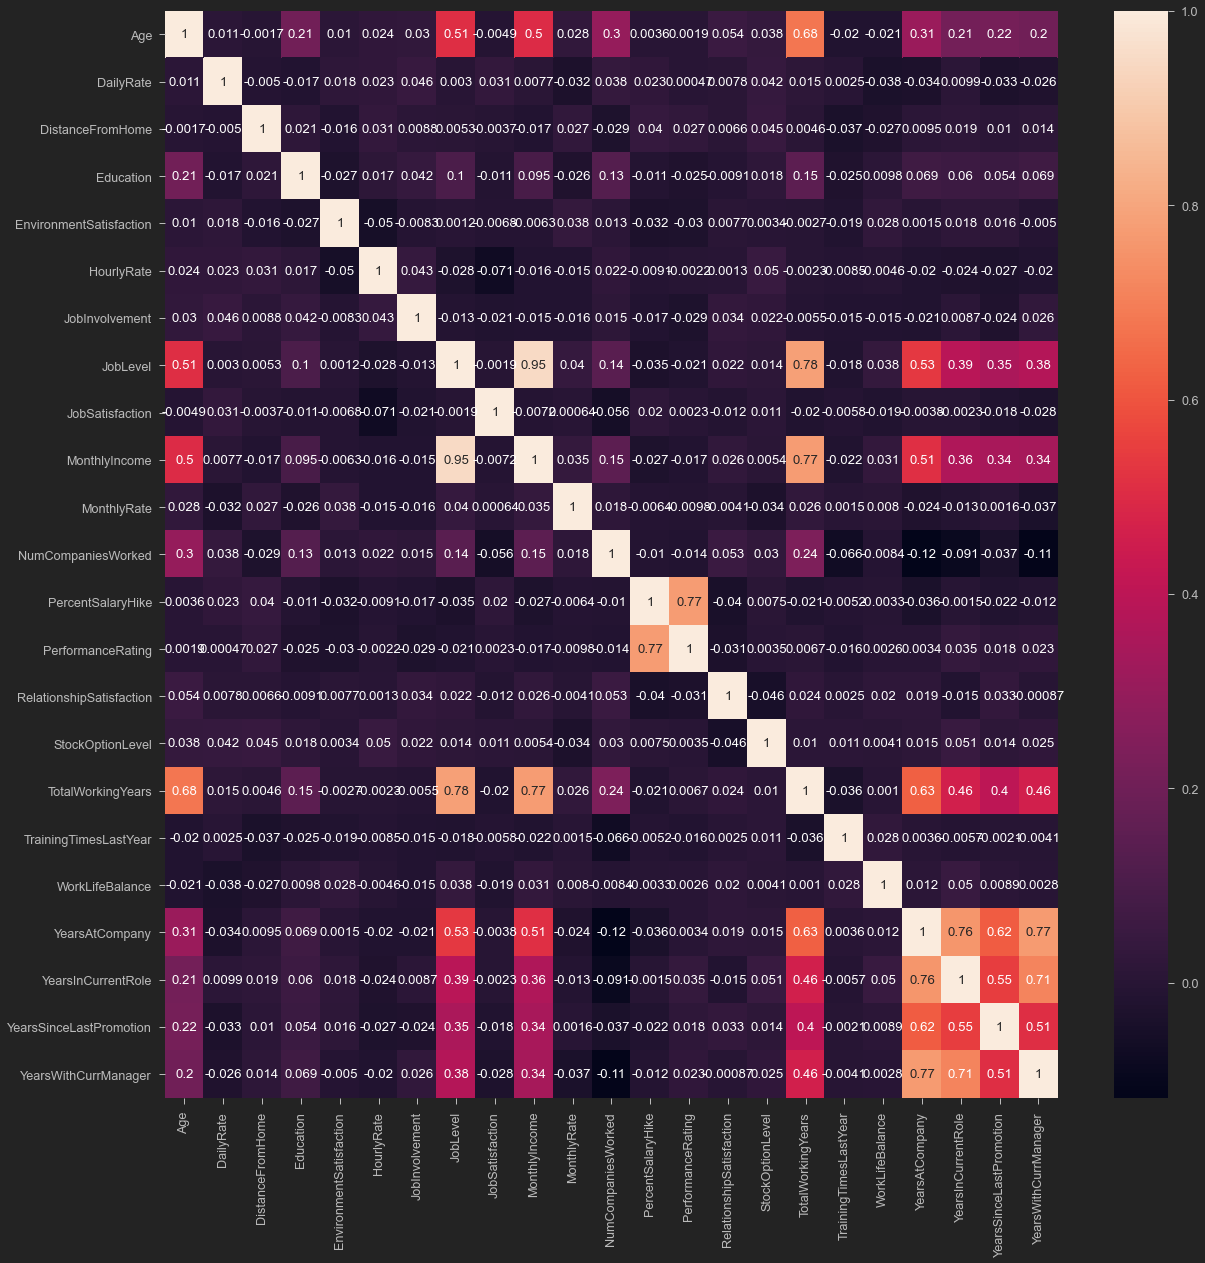

In [6]:
corr_df = hr_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns,
            yticklabels=corr_df.columns,
           annot=True)

In [7]:
hr_df = hr_df.drop(columns=['JobLevel'])
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [8]:
# encode dependent feature
hr_df['Attrition'] = np.where(hr_df['Attrition'] == 'Yes', 1, 0)
hr_df['OverTime'] = np.where(hr_df['OverTime'] == 'Yes', 1, 0)

In [9]:
biz_travel_dummies = pd.get_dummies(hr_df['BusinessTravel'], prefix='BusinessTravel')
dep_dummies = pd.get_dummies(hr_df['Department'], prefix='Department')
edu_dummies = pd.get_dummies(hr_df['Education'], prefix='Education')
edu_field_dummies = pd.get_dummies(hr_df['EducationField'], prefix='EducationField')
env_satisfy_dummies = pd.get_dummies(hr_df['EnvironmentSatisfaction'], prefix='EnvironmentSatisfaction')
gender_dummies = pd.get_dummies(hr_df['Gender'], prefix='Gender')
job_involve_dummies = pd.get_dummies(hr_df['JobInvolvement'], prefix='JobInvolvement')
job_role_dummies = pd.get_dummies(hr_df['JobRole'], prefix='JobRole')
job_satisfy_dummies = pd.get_dummies(hr_df['JobSatisfaction'], prefix='JobSatisfaction')
marital_dummies = pd.get_dummies(hr_df['MaritalStatus'], prefix='MaritalStatus')
overtime_dummies = pd.get_dummies(hr_df['OverTime'], prefix='OverTime')
perf_dummies = pd.get_dummies(hr_df['PerformanceRating'], prefix='PerformanceRating')
rel_dummies = pd.get_dummies(hr_df['RelationshipSatisfaction'], prefix='RelationshipSatisfaction')
stock_dummies = pd.get_dummies(hr_df['StockOptionLevel'], prefix='StockOptionLevel')
work_dummies = pd.get_dummies(hr_df['WorkLifeBalance'], prefix='WorkLifeBalance')

X_categ = pd.concat([biz_travel_dummies, dep_dummies, edu_dummies, edu_field_dummies, 
                      env_satisfy_dummies, gender_dummies, job_involve_dummies, 
                      job_role_dummies, job_satisfy_dummies, marital_dummies, 
                      overtime_dummies, perf_dummies, rel_dummies, stock_dummies, 
                      work_dummies], axis=1)
X_categ.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [10]:
X_numeric=hr_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
                       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' ]]

In [11]:
X_final=pd.concat([X_categ, X_numeric], axis=1)
X_final.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,41,1102,1,2,2,94,3,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,49,279,8,1,3,61,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,37,1373,2,2,4,92,2,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,33,1392,3,4,4,56,3,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,27,591,2,1,1,40,3,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


# General approach:

## 1. Identifying the Clusters

## 2. Prediction models: Random Forest

## 3. Survival Analysis

# Developing general approach:

## 1. Finding the optimal number of clusters using the "Elbow method"

### Scaling and Transforming Data

In [12]:
scaler=StandardScaler()
X_final_scaled=scaler.fit_transform(X_final)

### Using the Elbow Method to determine Clusters

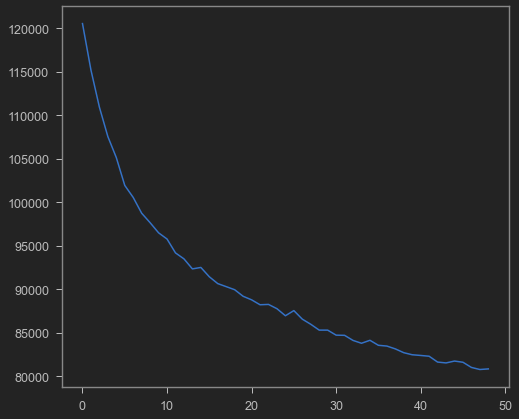

In [13]:
scores=[]
range_val=range(1,50)
for i in range_val:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_final_scaled)
    scores.append(kmeans.inertia_)
plt.plot(scores,'bx-')

### From the graph we will choose 10 clusters

### Applying K-means method

In [14]:
kmeans=KMeans(10)
kmeans.fit(X_final_scaled)
labels=kmeans.labels_

In [15]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[X_final.columns])
cluster_centers.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.156082,0.323821,-0.174868,-0.211604,-1.374051,1.515244,0.452244,-0.069723,0.044802,-0.239374,-0.183726,-0.136788,-0.197417,0.577964,-0.237034,-0.123682,0.260897,-0.142376,0.060396,0.074291,-0.004419,0.134219,-0.134219,0.111472,-0.082410,0.080653,-0.099126,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,4.087890,-0.115528,0.247519,0.001504,-0.112149,-0.238431,-0.121559,0.342483,0.080847,-0.080847,0.312297,-0.312297,0.115543,-0.001590,-0.053028,-0.043696,0.267475,-0.128267,-0.125885,-0.130354,-0.239904,-0.132107,0.186658,0.062895,-0.761170,-0.034180,-0.077846,-0.423389,0.079116,-0.072835,-0.063263,-0.052009,-0.833851,0.012157,-0.464108,-0.080847,-0.098453,-0.312297,-0.101315,-0.272643,-0.921815,0.102563,0.260509,-0.721555,-0.691135,-0.394230,-0.764208
1,0.058721,-0.057630,0.010489,-0.211604,0.727775,-0.659960,-0.361620,0.039458,0.165994,0.075165,-0.080010,-0.136788,0.117425,-0.348255,0.024835,0.118374,0.105005,0.012562,-0.015889,-0.008697,0.011647,-0.007525,0.007525,-0.104866,-0.067204,0.054978,0.089029,0.188626,-0.191498,0.372148,-0.254924,0.287387,-0.138332,0.322199,-0.533821,-0.244625,0.027111,-0.027383,0.067859,-0.067195,0.473455,0.246523,-0.685565,0.628241,-0.628241,0.426230,-0.426230,0.014835,0.117012,-0.017474,-0.098850,-0.867229,0.741670,0.396904,-0.247733,0.044498,0.154767,-0.139896,-0.023930,-0.060285,0.077910,-0.016932,0.215581,0.001587,0.078145,0.146445,-0.038038,-0.382689,-0.071318,0.145006,-0.628241,-0.292803,-0.426230,-0.096175,0.512496,-0.219611,-0.001618,-0.131715,-0.199978,-0.121824,-0.151271,-0.059067
2,-0.224478,0.157430,0.014065,-0.211604,0.488931,-0.412778,2.765332,-0.487210,-0.798105,-0.609318,-0.183726,-0.136788,0.062849,-0.348255,0.176605,0.004514,0.043642,-0.000039,0.138154,-0.052135,-0.066722,-0.167011,0.167011,0.001541,0.014364,0.047098,-0.100173,0.086065,-0.191498,0.342871,-0.228340,0.088406,-0.189810,0.299623,-0.260286,-0.244625,0.019996,-0.282499,0.038167,0.184464,-0.234314,0.107464,0.094149,-0.103345,0.103345,0.426230,-0.426230,0.013896,-0.116265,0.012811,0.078299,0.257726,-0.177728,0.056556,-0.247733,-0.139717,0.252481,-0.173569,0.031289,-0.695953,0.235719,-0.086855,-1.868426,-0.078159,-0.080196,-0.051665,0.163741,-0.411433,0.107611,-0.209335,0.103345,-0.200140,-0.426230,0.066472,-0.264967,-0.501996,-0.073535,-0.048074,-0.316761,-0.248

### Applying inverse transformation to understand the numbers

In [16]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[X_final.columns])
cluster_centers.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.054795,0.315068,0.630137,0.0,-1.110223e-16,1.000000e+00,2.602740e-01,1.643836e-01,4.109589e-01,1.643836e-01,-1.387779e-17,1.040834e-17,0.315068,2.876712e-01,0.205479,0.027397,0.164384,0.136986,0.219178,0.342466,0.301370,0.465753,0.534247,0.082192,0.219178,0.630137,0.068493,1.387779e-17,1.387779e-17,5.551115e-17,0.000000,1.387779e-17,6.938894e-18,-2.775558e-17,5.551115e-17,1.000000e+00,0.150685,0.287671,0.301370,0.260274,0.123288,0.397260,4.794521e-01,7.534247e-01,2.465753e-01,0.958904,4.109589e-02,0.232877,0.205479,0.287671,0.273973,5.616438e-01,3.424658e-01,6.849315e-02,2.739726e-02,6.938894e-18,0.178082,0.698630,0.123288,29.972603,788.698630,8.561644,2.479452,2.808219,64.410959,2.684932,2.671233,2578.534247,14399.602740,1.534247,2.465753e-01,14.849315,3.041096,2.602740,0.561644,4.109589,2.931507,2.945205,2.589041,1.726027,0.917808,1.397260
1,0.119816,0.165899,0.714286,0.0,1.000000e+00,1.110223e-16,1.387779e-17,2.073733e-01,4.700461e-01,3.041475e-01,1.843318e-02,2.081668e-17,0.470046,-1.387779e-17,0.327189,0.082949,0.119816,0.198157,0.188940,0.304147,0.308756,0.396313,0.603687,0.032258,0.225806,0.617512,0.124424,1.428571e-01,2.081668e-17,3.179724e-01,0.004608,1.843318e-01,2.304147e-02,3.271889e-01,5.551115e-17,-4.163336e-17,0.207373,0.179724,0.331797,0.281106,0.419355,0.580645,3.885781e-16,1.000000e+00,1.665335e-16,1.000000,-1.665335e-16,0.193548,0.253456,0.304147,0.248848,3.885781e-16,7.695853e-01,2.304147e-01,-6.938894e-18,6.451613e-02,0.299539,0.539171,0.096774,36.373272,833.912442,9.055300,3.133641,2.723502,67.479263,2.834101,2.686636,4701.861751,13805.649770,3.055300,1.665335e-16,14.138249,3.000000,2.608295,1.230415,9.571429,2.797235,2.668203,5.783410,3.788018,1.700461,3.912442
2,0.034091,0.250000,0.715909,0.0,8.863636e-01,1.136364e-01,1.000000e+00,-5.551115e-17,-1.110223e-16,-5.551115e-17,-2.775558e-17,1.040834e-17,0.443182,1.387779e-17,0.397727,0.056818,0.102273,0.193182,0.250000,0.284091,0.272727,0.318182,0.681818,0.056818,0.261364,0.613636,0.068182,1.136364e-01,6.938894e-18,3.068182e-01,0.011364,1.250000e-01,1.136364e-02,3.181818e-01,1.136364e-01,0.000000e+00,0.204545,0.079545,0.318182,0.397727,0.125000,0.511364,3.636364e-01,6.704545e-01,3.295455e-01,1.000000,0.000000e+00,0.193182,0.159091,0.318182,0.329545,5.568182e-01,3.181818e-01,1.250000e-01,-6.938894e-18,2.272727e-02,0.340909,0.52272

### Concatenating Cluster Labels to Dataset

In [17]:
df_cluster=pd.concat([X_final,pd.DataFrame({'Cluster':labels})], axis=1)
df_cluster.head(10)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,41,1102,1,2,2,94,3,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,7
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,49,279,8,1,3,61,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,9
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,37,1373,2,2,4,92,2,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,3
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,33,1392,3,4,4,56,3,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,27,591,2,1,1,40,3,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,2
5,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,32,1005,2,2,4,79,3,4,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6,5
6,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,59,1324,3,3,3,81,4,1,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0,4
7,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,30,1358,24,1,4,67,3,3,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0,9
8,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,38,216,23,3,4,44,2,3,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8,9
9,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,36,1299,27,3,3,94,3,3,5237,16577,6,0,13,3,2,2,17,3,2,7,7,7,7,1


## 2. Random Forest Prediction Modeling:

In [18]:
# we only scale the continuous values, not the categorical
cont_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
           'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cat_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
           'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
ss = StandardScaler()
hr_scaled_df = ss.fit_transform(hr_df[cont_cols].to_numpy())

hr_scaled_df = pd.concat([pd.DataFrame(hr_scaled_df, columns=cont_cols), 
                          hr_df[cat_cols], 
                          hr_df['Attrition']], axis=1)
hr_scaled_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,Sales Executive,4,Single,1,3,1,0,1,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,Research Scientist,2,Married,0,4,4,1,3,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,Travel_Rarely,Research & Development,2,Other,4,Male,2,Laboratory Technician,3,Single,1,3,2,0,3,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,Research Scientist,3,Married,1,3,3,0,3,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,Travel_Rarely,Research & Development,1,Medical,1,Male,3,Laboratory Technician,2,Married,0,3,4,1,3,0


In [19]:
# use smote for balancing data
dependent_df = hr_scaled_df['Attrition']
independent_df = hr_scaled_df.drop(columns=['Attrition'])
sm = SMOTENC(
    categorical_features=[independent_df.columns.get_loc(col) for col in cat_cols],
    sampling_strategy='auto', 
    k_neighbors=8, 
    random_state=42)
independent_resample, dependent_resample = sm.fit_resample(independent_df, dependent_df)
smoted_df = pd.concat([pd.DataFrame(independent_resample), pd.DataFrame(dependent_resample)], axis=1)
smoted_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,Sales Executive,4,Single,1,3,1,0,1,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,Research Scientist,2,Married,0,4,4,1,3,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,Travel_Rarely,Research & Development,2,Other,4,Male,2,Laboratory Technician,3,Single,1,3,2,0,3,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,Research Scientist,3,Married,1,3,3,0,3,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,Travel_Rarely,Research & Development,1,Medical,1,Male,3,Laboratory Technician,2,Married,0,3,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-1.378159,-1.180086,-0.302229,-1.691602,-0.830399,-1.092357,-0.780877,-0.393363,-1.255576,0.155707,-0.939088,-1.025896,-0.368715,-1.155935,Travel_Rarely,Sales,3,Marketing,4,Female,3,Sales Representative,3,Single,0,3,2,0,3,1
2462,0.839179,-0.885440,2.039522,-0.944745,0.862164,0.572545,0.409237,-0.681773,0.828145,-0.065325,-0.747482,-0.772797,-0.235151,-1.155935,Travel_Frequently,Sales,2,Life Sciences,2,Male,3,Sales Executive,3,Single,1,3,1,0,3,1
2463,-0.994284,0.363404,-0.441497,0.951813,-0.714668,1.009532,-0.678049,0.005367,-0.342629,-0.381764,0.262296,0.510471,-0.368715,0.289642,Travel_Rarely,Research & Development,1,Medical,3,Male,3,Laboratory Technician,4,Single,0,3,1,0,3,1
2464,-0.076276,-0.082383,-0.911821,0.927609,-0.454489,-0.938370,0.681074,-1.042880,-0.448912,-0.620189,-0.199245,-0.343571,-0.429862,0.131148,Travel_Rarely,Research & Development,3,Life Sciences,1,Male,3,Laboratory Technician,1,Married,0,3,3,0,3,1


In [20]:
import prince

famd = prince.FAMD(
    n_components=10, # look at first 10 components
    n_iter=10,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42 # constant seed for reproducability
)
# drop Attrition column as we are trying to predict that column
famd_fit = famd.fit(smoted_df.drop(columns=['Attrition'])) 
principle_components_df = famd_fit.transform(smoted_df.drop(columns=['Attrition']))
smoted_df = pd.concat([smoted_df, principle_components_df], axis=1)

rename_cols = {}
for col in principle_components_df:
    rename_cols[col] = 'PC' + str(col + 1)

smoted_df = smoted_df.rename(columns=rename_cols)
famd_fit.explained_inertia_

array([0.10606221, 0.0639568 , 0.05878143, 0.04283829, 0.04179814,
       0.0363634 , 0.03390849, 0.03076356, 0.02985574, 0.02805998])

In [21]:
biz_travel_dummies = pd.get_dummies(smoted_df['BusinessTravel'], prefix='BusinessTravel')
dep_dummies = pd.get_dummies(smoted_df['Department'], prefix='Department')
edu_dummies = pd.get_dummies(smoted_df['Education'], prefix='Education')
edu_field_dummies = pd.get_dummies(smoted_df['EducationField'], prefix='EducationField')
env_satisfy_dummies = pd.get_dummies(smoted_df['EnvironmentSatisfaction'], prefix='EnvironmentSatisfaction')
gender_dummies = pd.get_dummies(smoted_df['Gender'], prefix='Gender')
job_involve_dummies = pd.get_dummies(smoted_df['JobInvolvement'], prefix='JobInvolvement')
job_role_dummies = pd.get_dummies(smoted_df['JobRole'], prefix='JobRole')
job_satisfy_dummies = pd.get_dummies(smoted_df['JobSatisfaction'], prefix='JobSatisfaction')
marital_dummies = pd.get_dummies(smoted_df['MaritalStatus'], prefix='MaritalStatus')
overtime_dummies = pd.get_dummies(smoted_df['OverTime'], prefix='OverTime')
perf_dummies = pd.get_dummies(smoted_df['PerformanceRating'], prefix='PerformanceRating')
rel_dummies = pd.get_dummies(smoted_df['RelationshipSatisfaction'], prefix='RelationshipSatisfaction')
stock_dummies = pd.get_dummies(smoted_df['StockOptionLevel'], prefix='StockOptionLevel')
work_dummies = pd.get_dummies(smoted_df['WorkLifeBalance'], prefix='WorkLifeBalance')

smoted_df = pd.concat([smoted_df[cont_cols],
                      smoted_df[['Attrition', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                               'PC6', 'PC7', 'PC8', 'PC9', 'PC10']],
                      biz_travel_dummies, dep_dummies, edu_dummies, edu_field_dummies, 
                      env_satisfy_dummies, gender_dummies, job_involve_dummies, 
                      job_role_dummies, job_satisfy_dummies, marital_dummies, 
                      overtime_dummies, perf_dummies, rel_dummies, stock_dummies, 
                      work_dummies], axis=1)
smoted_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,1,0.143175,0.945830,-0.290269,-0.638043,-0.243431,-0.216661,0.755124,0.394368,-0.490037,-0.969495,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,0,0.444775,-0.934924,-0.041711,1.029183,0.453909,1.279069,-0.448024,0.390465,0.523544,0.480587,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,1,-1.161955,-0.716335,-0.093149,-0.403118,-0.189521,-0.063864,0.102547,-0.129047,0.158044,0.514846,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,0,-0.105268,-0.490896,-0.112175,0.987922,0.481711,-0.703366,0.079142,0.820046,-0.090463,-0.365511,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,0,-0.677547,-0.612134,0.065789,-0.609373,-1.029145,-0.585791,-0.255987,-0.110201,-0.540398,1.117569,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(smoted_df.drop(columns=['Attrition']), 
                                                    smoted_df['Attrition'], 
                                                    train_size=0.7,
                                                    random_state=42) # random state set for reproducable results

rand_forest_fit = RandomForestClassifier(n_estimators=1000, 
                                         criterion="gini", 
                                         max_depth=100, 
                                         min_samples_split=3, 
                                         min_samples_leaf=2) # these hyperparameters will need to be tuned

rand_forest_fit.fit(x_train, y_train)
print("Random Forest - Train Confusion Matrix\n", pd.crosstab(y_train, 
                                                              rand_forest_fit.predict(x_train), 
                                                              rownames=["Actual"], 
                                                              colnames=["Predicted"]))

print("Random Forest - Train accuracy", round(accuracy_score(y_train, rand_forest_fit.predict(x_train)), 3))

print("Random Forest - Test Confusion Matrix", pd.crosstab(y_test, 
                                                           rand_forest_fit.predict(x_test), 
                                                           rownames=["Actual"], 
                                                           colnames=["Predicted"]))

print("Random Forest - Test accuracy", round(accuracy_score(y_test, rand_forest_fit.predict(x_test)), 3))

Random Forest - Train Confusion Matrix
 Predicted    0    1
Actual             
0          863    1
1            7  855
Random Forest - Train accuracy 0.995
Random Forest - Test Confusion Matrix Predicted    0    1
Actual             
0          328   41
1           43  328
Random Forest - Test accuracy 0.886


In [23]:
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {
    'clf__n_estimators': (200, 300, 500),
    'clf__max_depth': (20, 30, 50),
    'clf__min_samples_split': (2, 3),
    'clf__min_samples_leaf': (1, 2)}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)
print('Best Training score: ' + str(grid_search.best_score_))
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(str(param_name) + ': ' + str(best_parameters[param_name]))
    
predictions = grid_search.predict(x_test)
print("Testing accuracy: " + str(accuracy_score(y_test, predictions)))
print("Complete report of Testing data", classification_report(y_test, predictions))
print("Random Forest Grid Search - Test Confusion Matrix", pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"]))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.1min finished


Best Training score: 0.8945530702856666
Best parameters set:
clf__max_depth: 20
clf__min_samples_leaf: 1
clf__min_samples_split: 2
clf__n_estimators: 300
Testing accuracy: 0.8851351351351351
Complete report of Testing data               precision    recall  f1-score   support

           0       0.88      0.89      0.89       369
           1       0.89      0.88      0.88       371

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740

Random Forest Grid Search - Test Confusion Matrix Predicted    0    1
Actual             
0          329   40
1           45  326


# Feature Importance for Survival Analysis

Feature ranking:
Feature 75 , StockOptionLevel_0 0.09752673153361002
Feature 17 , PC4 0.07840363226160732
Feature 14 , PC1 0.058324303222053994
Feature 15 , PC2 0.04533761072545501
Feature 16 , PC3 0.041164549254812666
Feature 76 , StockOptionLevel_1 0.03947979317793371
Feature 0 , Age 0.029097962232785983
Feature 8 , TotalWorkingYears 0.026482103827515868
Feature 4 , MonthlyIncome 0.026171796597668915
Feature 66 , MaritalStatus_Single 0.0254604313732663
Feature 10 , YearsAtCompany 0.025245619552607127
Feature 20 , PC7 0.02496947032675109
Feature 18 , PC5 0.023085737014044594
Feature 13 , YearsWithCurrManager 0.022747130261159876
Feature 68 , OverTime_1 0.02273199574666921
Feature 67 , OverTime_0 0.02113727958779176
Feature 22 , PC9 0.019923705407053974
Feature 2 , DistanceFromHome 0.019763379934038185
Feature 6 , NumCompaniesWorked 0.019040317879679386
Feature 19 , PC6 0.01780713046071927
Feature 23 , PC10 0.01755615072981575
Feature 9 , TrainingTimesLastYear 0.017433340252491342
Feat

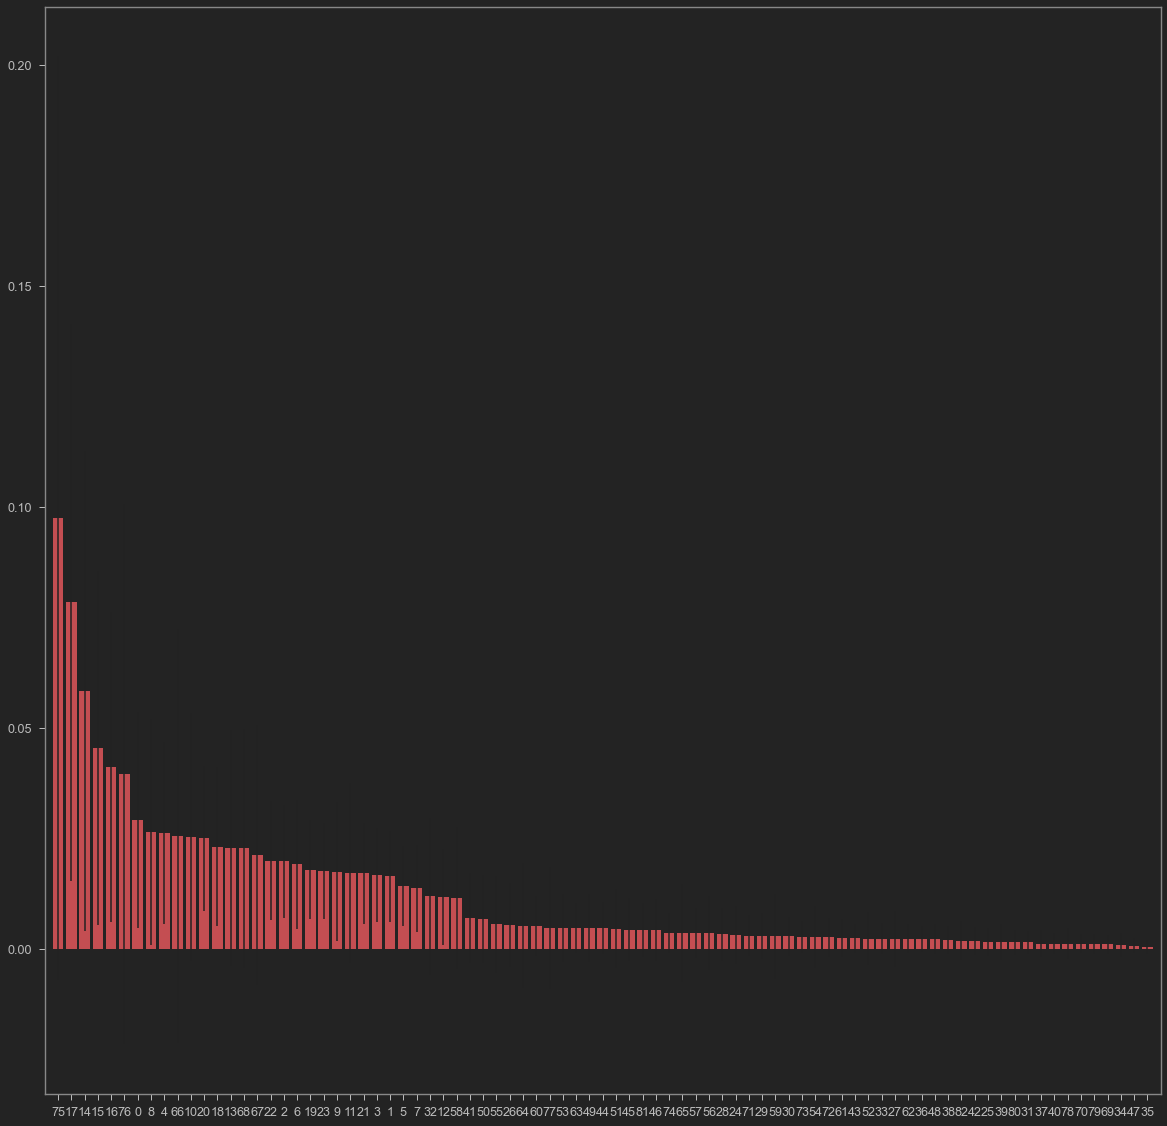

In [24]:
rand_forest_fit = RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=2)
rand_forest_fit.fit(x_train, y_train)
importances = rand_forest_fit.feature_importances_
standard_deviations = np.std([tree.feature_importances_ for tree in rand_forest_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
column_names = list(x_train.columns)

print("Feature ranking:")
for feature in range(x_train.shape[1]):
    print ("Feature", indices[feature], ",", column_names[indices[feature]], importances[indices[feature]])
    
plt.figure(figsize=(20,20))
plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr=standard_deviations[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Using top 10 features from Random Forest feature importance

In [25]:
X_important=df_cluster[['MonthlyIncome','TotalWorkingYears', 'Age', 'DistanceFromHome', 'YearsAtCompany',
                         'YearsWithCurrManager', 'YearsInCurrentRole', 'MaritalStatus_Single', 'OverTime_1', 'NumCompaniesWorked']]
X_important.head()

,MonthlyIncome,TotalWorkingYears,Age,DistanceFromHome,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,MaritalStatus_Single,OverTime_1,NumCompaniesWorked
0,5993,8,41,1,6,5,4,1,1,8
1,5130,10,49,8,10,7,7,0,0,1
2,2090,7,37,2,0,0,0,1,1,6
3,2909,8,33,3,8,0,7,0,1,1
4,3468,6,27,2,2,2,2,0,0,9


### Creating the DataFrame for Survival Analysis

In [26]:
df_survival=pd.concat([X_important, hr_df['Attrition'], pd.DataFrame({'Cluster':labels})],axis=1)
df_survival.head()

,MonthlyIncome,TotalWorkingYears,Age,DistanceFromHome,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,MaritalStatus_Single,OverTime_1,NumCompaniesWorked,Attrition,Cluster
0,5993,8,41,1,6,5,4,1,1,8,1,7
1,5130,10,49,8,10,7,7,0,0,1,0,9
2,2090,7,37,2,0,0,0,1,1,6,1,3
3,2909,8,33,3,8,0,7,0,1,1,0,3
4,3468,6,27,2,2,2,2,0,0,9,0,2


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

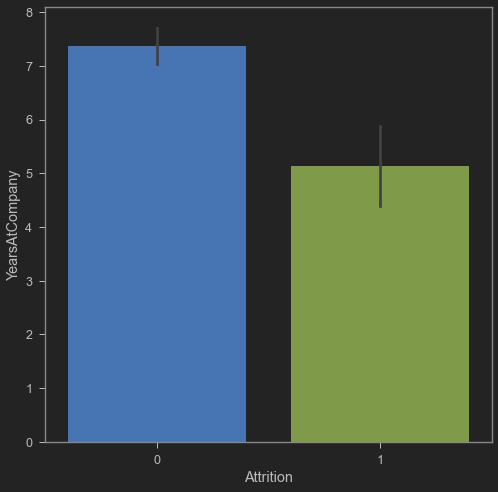

In [27]:
plt.figure(figsize=(8,8))
sns.barplot(data=df_survival, x=df_survival['Attrition'], y=df_survival['YearsAtCompany'])

In [28]:
df_survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MonthlyIncome         1470 non-null   int64
 1   TotalWorkingYears     1470 non-null   int64
 2   Age                   1470 non-null   int64
 3   DistanceFromHome      1470 non-null   int64
 4   YearsAtCompany        1470 non-null   int64
 5   YearsWithCurrManager  1470 non-null   int64
 6   YearsInCurrentRole    1470 non-null   int64
 7   MaritalStatus_Single  1470 non-null   uint8
 8   OverTime_1            1470 non-null   uint8
 9   NumCompaniesWorked    1470 non-null   int64
 10  Attrition             1470 non-null   int64
 11  Cluster               1470 non-null   int32
dtypes: int32(1), int64(9), uint8(2)
memory usage: 112.1 KB


### Using the Kaplan-Meier Model

In [29]:
from lifelines import KaplanMeierFitter

In [30]:
kmf=KaplanMeierFitter()
kmf.fit(df_survival['YearsAtCompany'], df_survival['Attrition'], label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 1470 total observations, 1233 right-censored observations>

### The Kaplan-Meier estimator is a non-parametric estimator that allows us to use observed data to estimate the survival distribution. The curve plots the cumulative probability of survival beyond each given time period.

<AxesSubplot:xlabel='timeline'>

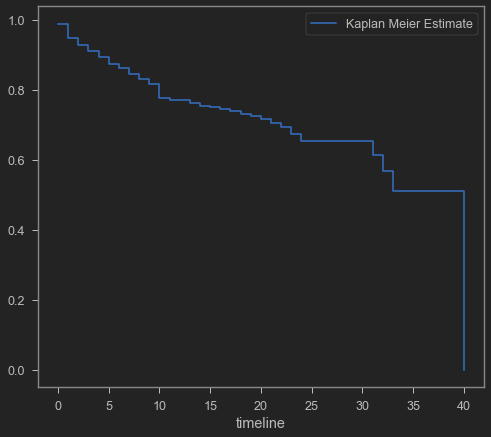

In [31]:
kmf.plot(ci_show=False)

### Plotting the Kaplan- Meier Curve per Cluster

In [32]:
clust=pd.DataFrame({'Cluster':labels})
clust_0=df_survival[df_survival['Cluster']==0]
clust_1=df_survival[df_survival['Cluster']==1]
clust_2=df_survival[df_survival['Cluster']==2]
clust_3=df_survival[df_survival['Cluster']==3]
clust_4=df_survival[df_survival['Cluster']==4]
clust_5=df_survival[df_survival['Cluster']==5]
clust_6=df_survival[df_survival['Cluster']==6]
clust_7=df_survival[df_survival['Cluster']==7]
clust_8=df_survival[df_survival['Cluster']==8]
clust_9=df_survival[df_survival['Cluster']==9]

### The survival function measures the probability that a cluster will survive past year "t". Using the Kaplan-Meier curve allows us to visually inspect differences in survival rates by cluster category.

Text(0, 0.5, 'Survival probability')

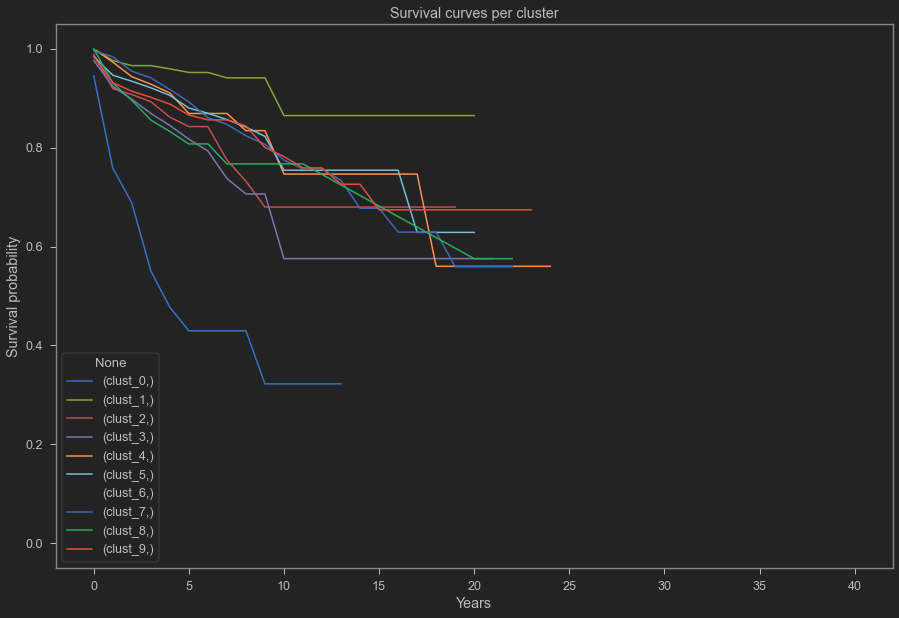

In [34]:
ax = plt.axes()
kmf.fit(clust_0['YearsAtCompany'], clust_0['Attrition'], label=['clust_0'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_1['YearsAtCompany'], clust_1['Attrition'], label=['clust_1'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_2['YearsAtCompany'], clust_2['Attrition'], label=['clust_2'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_3['YearsAtCompany'], clust_3['Attrition'], label=['clust_3'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_4['YearsAtCompany'], clust_4['Attrition'], label=['clust_4'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_5['YearsAtCompany'], clust_5['Attrition'], label=['clust_5'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_6['YearsAtCompany'], clust_6['Attrition'], label=['clust_6'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_7['YearsAtCompany'], clust_7['Attrition'], label=['clust_7'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_8['YearsAtCompany'], clust_8['Attrition'], label=['clust_8'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_9['YearsAtCompany'], clust_9['Attrition'], label=['clust_9'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)

plt.title('Survival curves per cluster')
plt.xlabel('Years')
plt.ylabel('Survival probability')

### Using Cox Proportional Hazard Model

<b>We can examine the confidence interval of different important features to assess its significance.</b>

In [35]:
from lifelines import CoxPHFitter

In [36]:
cph = CoxPHFitter()

In [37]:
cph.fit(df_survival, duration_col='YearsAtCompany', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [38]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1245.11
         time fit was run = 2021-03-14 19:16:16 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
MonthlyIncome         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
TotalWorkingYears     -0.15       0.86       0.03            -0.21            -0.09                 0.81                 0.91
Age                   -0.02       0.98       0.01            -0.05            -0.00                 0.96                 1.00
DistanceFromHome       0.02       1.02       0.01             0.00             0.04                 1.00                 1.04
YearsWithCurrManager  -0.30       0.74       0.03            -0.36            -0.23                 0.70                 0.79
YearsInCurrentRole    -0.29       0.75       0.03            -0.36            -0.23                 0.70                 0.80
MaritalStatus_Single   0.89       2.44       0.14             0.63             1.16                 1.87                 3.19
OverTime_1             1.16       3.18       0.13             0.90             1.42                 2.45                 4.12
NumCompaniesWorked     0.21       1.23       0.03             0.16             0.26                 1.17                 1.30
Cluster                0.00       1.00       0.02            -0.05             0.05                 0.96                 1.05

                         z      p   -log2(p)
covariate                                   
MonthlyIncome        -2.87 <0.005       7.91
TotalWorkingYears    -5.00 <0.005      20.74
Age                  -2.37   0.02       5.80
DistanceFromHome      2.54   0.01       6.50
YearsWithCurrManager -9.25 <0.005      65.23
YearsInCurrentRole   -8.86 <0.005      60.15
MaritalStatus_Single  6.55 <0.005      34.03
OverTime_1            8.74 <0.005      58.55
NumCompaniesWorked    8.12 <0.005      50.89
Cluster               0.10   0.92       0.12
---
Concordance = 0.93
Partial AIC = 2510.22
log-likelihood ratio test = 658.02 on 10 df
-log2(p) of ll-ratio test = 445.78

### Based on p-values < 0.05 and below plot, we can see that the main significant features includes: 
- AGE
- MONTHLY INCOME
- TOTAL WORKING YEARS
- YEARS WITH CURRENT MANAGER
- YEARS IN CURRENT ROLE 

### These features are the main drivers for employees to stay at the company.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

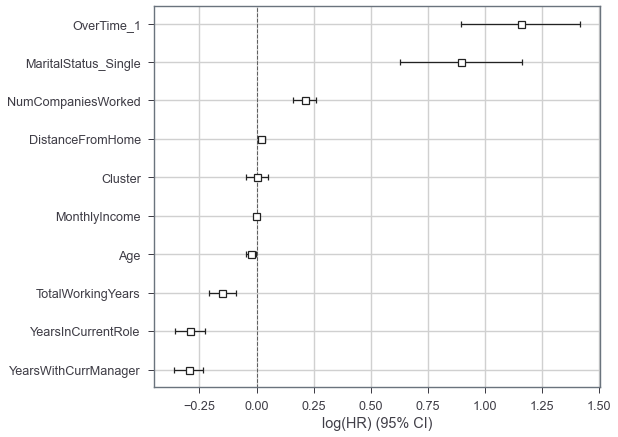

In [39]:
from jupyterthemes import jtplot
jtplot.style(theme='grade3',context='notebook',ticks=True, grid=True)
cph.plot()